# Random Forest Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_path = "../../files/"

## Base `plano_saude2`

In [2]:
base = pd.read_csv(file_path + 'plano_saude2.csv')

X = base.iloc[:, 0:1].values
y = base.iloc[:, 1].values

In [10]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10)
regressor.fit(X, y)
score = regressor.score(X, y)
print("Score no Treinamento:", score)

Score no Treinamento: 0.9483646413211871


In [11]:
previsao = regressor.predict(np.array(40).reshape(1, -1))
previsao

array([1397.])

Text(0, 0.5, 'Custo')

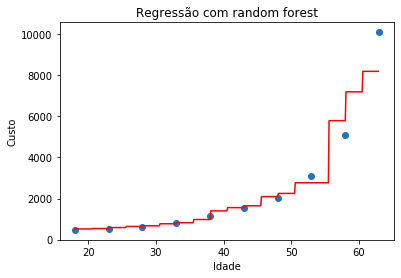

In [12]:
import numpy as np
X_teste = np.arange(min(X), max(X), 0.1)
X_teste = X_teste.reshape(-1,1)

import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X_teste, regressor.predict(X_teste), color = 'red')
plt.title('Regressão com random forest')
plt.xlabel('Idade')
plt.ylabel('Custo')

## Base `house-prices`

In [25]:
base = pd.read_csv(file_path + 'house-prices.csv')

X = base.iloc[:, 3:19].values
y = base.iloc[:, 2].values

from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(
    X, y, test_size = 0.3, random_state = 0)

In [26]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_treinamento, y_treinamento)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [27]:
previsoes = regressor.predict(X_teste)

score = regressor.score(X_treinamento, y_treinamento)
print("Score no Treinamento:", score)

Score no Treinamento: 0.9804094276982857


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_teste, previsoes)
print("MAE - MeanAbsoluteError ==>", mae)
mse = mean_squared_error(y_teste, previsoes)
print("MSE - MeanSquareError   ==>", mse)

MAE - MeanAbsoluteError ==> 67741.42737080285
MSE - MeanSquareError   ==> 16280324675.807644


In [29]:
print("Score no Teste:", regressor.score(X_teste, y_teste))

Score no Teste: 0.8814182151122472


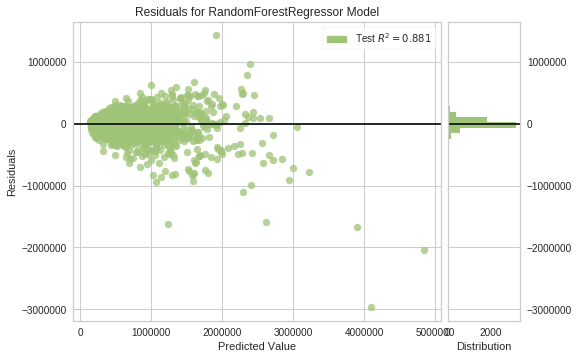

In [30]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regressor)
visualizer.score(X_teste, y_teste)
visualizer.show()

## Base `Position_Salaries`

In [33]:
# Importing the dataset
dataset = pd.read_csv(file_path + 'Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Splitting the dataset into the Training set and Test set
"""from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1))
"""

# pass
""

''

In [34]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [35]:
# Predicting a new result
y_pred = regressor.predict([[6.5]])

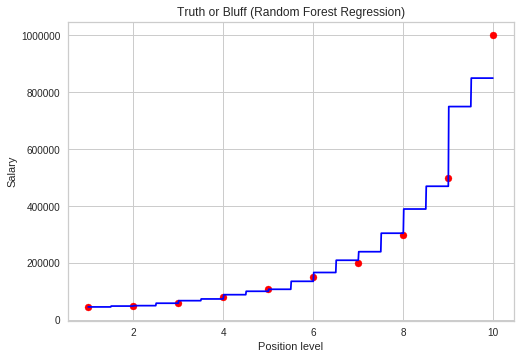

In [36]:
# Visualising the Random Forest Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Questions English ML-AZ Random Forest Regression

### Random Forest Regression Intuition

What is the advantage and drawback of Random Forests compared to Decision Trees? 

Advantage: Random Forests can give you a better predictive power than Decision Trees.
Drawback: Decision Tree will give you more interpretability than Random Forests, because you can plot the
graph of a Decision Tree to see the different splits leading to the prediction, as seen in the Intuition Lecture.
That’s something you can’t do with Random Forests.

When to use Random Forest and when to use the other models?

The best answer to that question is: try them all!
Indeed, thanks to the templates it will only take you 10 minutes to try all the models, which is very little
compared to the time dedicated to the other parts of a data science project (like Data Preprocessing for
example). So just don’t be scared to try all the regression models and compare the results (through cross
validation which we will see in Part 10). That’s we gave you the maximum models in this course for you to
have in your toolkit and increase your chance of getting better results.
However then, if you want some shortcuts, here are some rules of thumbs to help you decide which model to
use:
First, you need to figure out whether your problem is linear or non linear. You will learn how to do that in
Part 10 - Model Selection. Then: If your problem is linear, you should go for Simple Linear Regression if
you only have one feature, and Multiple Linear Regression if you have several features.
If your problem is non linear, you should go for Polynomial Regression, SVR, Decision Tree or Random
Forest. Then which one should you choose among these four? That you will learn in Part 10 - Model
Selection. The method consists of using a very relevant technique that evaluates your models performance,
called k-Fold Cross Validation, and then picking the model that shows the best results. Feel free to jump
directly to Part 10 if you already want to learn how to do that.

### Random Forest Regression in Python

How do I know how many trees I should use?

First, I would recommend to choose the number of trees by experimenting. It usually takes less time than
we think to figure out a best value by tweaking and tuning your model manually. That’s actually what we
do in general when we build a Machine Learning model: we do it in several shots, by experimenting several
values of hyperparameters like the number of trees. However, also know that in Part 10 we will cover k-Fold
Cross Validation and Grid Search, which are powerful techniques that you can use to find the optimal value
of a hyperparameter, like here the number of trees.